This is the template for reducing dimension to display clusters after applying Kmeans

             0         1         2         3         4         5         6  \
0     1.010019  0.494297  0.259749  0.123944  0.509999  0.251931 -0.056347   
1     0.294532 -0.426086 -0.178505  0.433755  0.005559 -0.129559  0.875747   
2     1.014985  0.380410  0.823814  0.668198  0.557172  0.440041  0.081779   
3     1.035804  0.457886  0.253879  0.244623  0.181136  0.362494  0.218445   
4     1.303166  0.400245  0.017699 -0.048612  0.580809  0.528739 -0.326785   
...        ...       ...       ...       ...       ...       ...       ...   
1021  0.192714 -0.660841  0.656070 -0.074150 -0.413697 -0.028921 -0.173059   
1022 -0.414751  0.214760  1.441947 -0.380417  0.126840 -0.921868 -0.408041   
1023 -0.103084  0.449683  0.717216  0.111211 -0.410013 -0.603131 -0.879963   
1024 -0.259747  0.492169  1.260280 -0.572564 -0.051796 -0.944987 -0.537554   
1025 -0.403763  0.317306  1.332013 -0.692752  0.296403 -0.997577 -0.669453   

             7         8         9  ...       758       759    

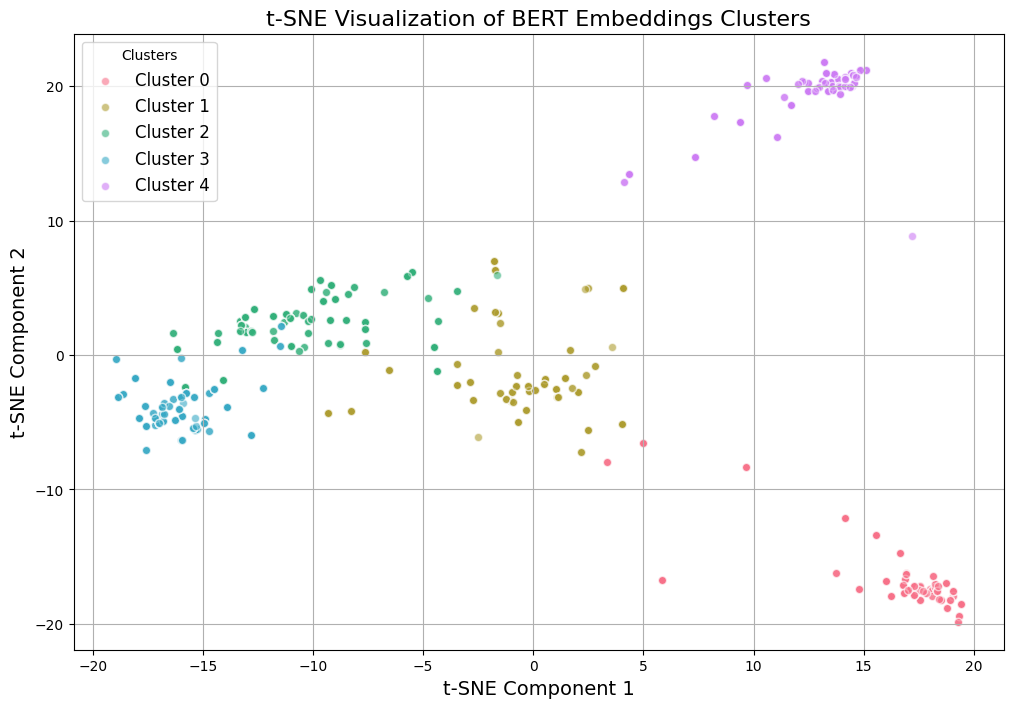

In [20]:
#template for visualization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns  # For better color palettes

# Load your BERT embeddings data
df = pd.read_csv(r'D:\CODING\Project\NVIDIA-Stock-prediction\data\synthesis\embedding\BERT_EmbeddingText.csv')
df = df.drop('timestamp', axis=1)
print(df)
# Standardize the data
df = pd.DataFrame(StandardScaler().fit_transform(df))

# Perform K-Means clustering
n_clusters = 5  # Set the number of clusters
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(df)

# Calculate silhouette score
silhouette_avg = silhouette_score(df, model.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Add cluster labels to the original DataFrame

# Dimensionality reduction for visualization using t-SNE
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(df)

# Create a DataFrame for t-SNE results
pca_df = pd.DataFrame(pca_results, columns=['Component 1', 'Component 2'])
pca_df['Cluster'] = model.labels_

# Create a color palette
palette = sns.color_palette("husl", n_clusters)  # Generates a palette with distinct colors

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['Component 1'], subset['Component 2'],
                label=f'Cluster {cluster}',
                color=palette[cluster],  # Unique color for each cluster
                alpha=0.6,
                edgecolor='w')  # Optional: white edge color for better visibility

# Customize the plot
plt.title('t-SNE Visualization of BERT Embeddings Clusters', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Clusters', fontsize=12)
plt.grid(True)
plt.show()
